In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Business Understanding
The main problem of electric vehicle is high initial cost. Cost of electric vehicle is high as compare to conventional vehicle. And other main problem is battery and charging system. We can predict the price of the electric vehicle car by using the different types of the regression model.

Data Understanding
Attributes Description:

Battery - The capacity of the vehicle's battery in kilowatt-hours (kWh).

Car_Name - The model name of the electric vehicle.

Car_name_link - A direct link to the corresponding page on EV Database for more in-depth information.

Efficiency - The energy efficiency rating of the vehicle in watt-hours per kilometer (Wh/km).

Fast_charge - The fast-charging capability of the vehicle in minutes for a certain charging percentage.

Price - The price of the electric vehicle in Germany.

Range - The driving range of the vehicle on a single charge in kilometers.

Top_speed - The maximum speed the vehicle can achieve in kilometers per hour.

Acceleration - The acceleration time from 0 to 100 kilometers per hour.

In [4]:
data = pd.read_csv('Electric Vehicle Specifications and Prices.csv')
data

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4
...,...,...,...,...,...,...,...,...,...
355,46.3,Citroen e-Jumpy Combi XL 50 kWh,https://ev-database.org/car/1596/Citroen-e-Jum...,257,290.0,52730.0,180,130,12.1
356,46.3,Fiat E-Ulysse L2 50 kWh,https://ev-database.org/car/1721/Fiat-E-Ulysse...,250,290.0,55990.0,185,130,12.1
357,46.3,Opel Vivaro-e Combi L 50 kWh,https://ev-database.org/car/1601/Opel-Vivaro-e...,257,290.0,51825.0,180,130,12.1
358,68.0,Opel Zafira-e Life M 75 kWh,https://ev-database.org/car/1348/Opel-Zafira-e...,257,290.0,69250.0,265,130,13.3


In [5]:
#Display first 5 row of the dataset
data.head()

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


In [6]:
# Display the all the columns of the dataset
data.columns

Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')

In [7]:
# Show total number of the rows and columns
data.shape

(360, 9)

In [8]:
# Overview of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Battery               360 non-null    float64
 1   Car_name              360 non-null    object 
 2   Car_name_link         360 non-null    object 
 3   Efficiency            360 non-null    int64  
 4   Fast_charge           358 non-null    float64
 5   Price.DE.             309 non-null    float64
 6   Range                 360 non-null    int64  
 7   Top_speed             360 non-null    int64  
 8   acceleration..0.100.  360 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 25.4+ KB


In [9]:
# Rename the column name for easier manipulation
data.rename({'Fast_charge':'FastCharge',
             'Price.DE.':'Price',
             'Top_speed':'TopSpeed',
             'acceleration..0.100.':'AccelerationTime'},axis=1,inplace=True)

data.head()

,Battery,Car_name,Car_name_link,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


In [10]:
# Detect the Missing value
data.isnull().sum()

Battery              0
Car_name             0
Car_name_link        0
Efficiency           0
FastCharge           2
Price               51
Range                0
TopSpeed             0
AccelerationTime     0
dtype: int64

In [11]:
# Display the duplicate
print(data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
355    False
356    False
357    False
358    False
359    False
Length: 360, dtype: bool


In [12]:
# Display the unique value
data['Range'].unique()

array([435, 420, 330, 360, 505, 350, 370, 250, 485, 515, 380, 390, 415,
       385, 455, 560, 235, 475, 575, 340, 165, 450, 305, 405, 510, 280,
       335, 410, 300, 400, 500, 315, 425, 285, 135, 180, 430, 440, 495,
       310, 345, 295, 290, 465, 685, 520, 255, 470, 365, 260, 320, 635,
       530, 170, 245, 535, 525, 355, 160, 480, 665, 490, 265, 445, 580,
       270, 590, 220, 395, 205, 610, 200, 460, 225, 150, 210, 230, 185],
      dtype=int64)

In [13]:
#There are some duplicate cars in dataset
data.Car_name.value_counts()

Car_name
Mercedes EQB 300 4MATIC        2
Mini Cooper SE                 2
Mercedes EQE SUV 500 4MATIC    2
Mercedes EQA 300 4MATIC        2
Mercedes EQA 250+              2
                              ..
MG Marvel R                    1
Smart #3                       1
Fiat 600e                      1
BMW iX M60                     1
Fiat E-Ulysse L3 50 kWh        1
Name: count, Length: 351, dtype: int64

In [14]:
# Display the duplicate cars
display(data[data['Car_name']=='Mini Cooper SE'])
display(data[data['Car_name']=='Mercedes EQB 300 4MATIC'])
display(data[data['Car_name']=='Mercedes EQE SUV 500 4MATIC'])
display(data[data['Car_name']=='Mercedes EQB 300 4MATIC'])
display(data[data['Car_name']=='Mercedes EQA 300 4MATIC'])

,Battery,Car_name,Car_name_link,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
52,28.9,Mini Cooper SE,https://ev-database.org/car/1409/Mini-Cooper-SE,161,260.0,35700.0,180,150,7.3
161,49.0,Mini Cooper SE,https://ev-database.org/car/1998/Mini-Cooper-SE,158,440.0,36900.0,310,170,6.7


,Battery,Car_name,Car_name_link,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
111,66.5,Mercedes EQB 300 4MATIC,https://ev-database.org/car/1559/Mercedes-EQB-...,196,490.0,NaN,340,160,8.0
241,66.5,Mercedes EQB 300 4MATIC,https://ev-database.org/car/1989/Mercedes-EQB-...,193,500.0,55519.0,345,160,8.0


,Battery,Car_name,Car_name_link,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
160,96.0,Mercedes EQE SUV 500 4MATIC,https://ev-database.org/car/2048/Mercedes-EQE-...,211,630.0,99841.0,455,210,4.9
203,90.6,Mercedes EQE SUV 500 4MATIC,https://ev-database.org/car/1762/Mercedes-EQE-...,208,650.0,NaN,435,210,4.9


,Battery,Car_name,Car_name_link,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
111,66.5,Mercedes EQB 300 4MATIC,https://ev-database.org/car/1559/Mercedes-EQB-...,196,490.0,NaN,340,160,8.0
241,66.5,Mercedes EQB 300 4MATIC,https://ev-database.org/car/1989/Mercedes-EQB-...,193,500.0,55519.0,345,160,8.0


,Battery,Car_name,Car_name_link,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
201,66.5,Mercedes EQA 300 4MATIC,https://ev-database.org/car/1495/Mercedes-EQA-...,190,500.0,NaN,350,160,7.7
292,66.5,Mercedes EQA 300 4MATIC,https://ev-database.org/car/1986/Mercedes-EQA-...,187,510.0,53520.0,355,160,7.7


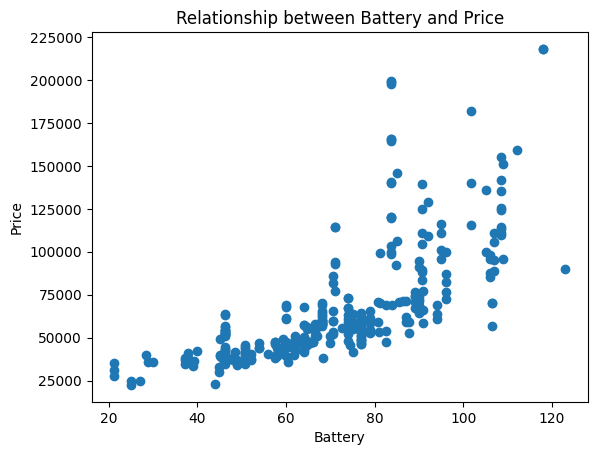

In [33]:
# visualize the distribution of each feature in the dataset

# Scatter plot of Battery vs price
plt.scatter(data['Battery'], data['Price'])
plt.xlabel('Battery')
plt.ylabel('Price')
plt.title('Relationship between Battery and Price')
plt.show()

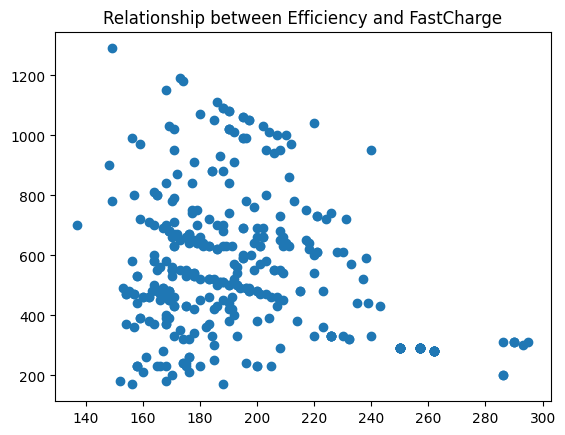

In [16]:
# Scatter plot between Efficiency and FastCharge
plt.scatter(data['Efficiency'],data['FastCharge'])
#plt.xlabel('FastCharge')
#plt.ylabel('Efficiency')
plt.title('Relationship between Efficiency and FastCharge')
plt.show()

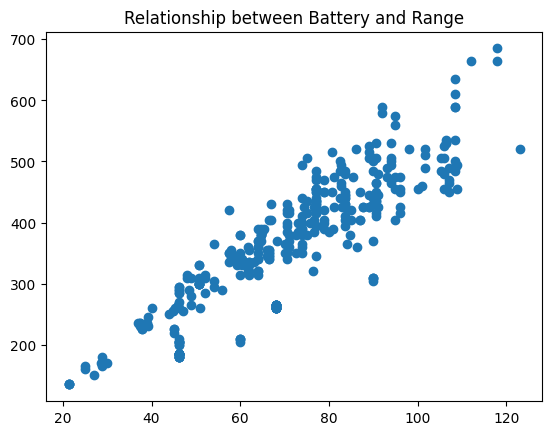

In [17]:
# Scatter plot between Battery and range
plt.scatter(x=data['Battery'], y=data['Range'])
#plt.xlabel=('Battery')
#plt.ylabel=('Range')
plt.title('Relationship between Battery and Range')
plt.show()


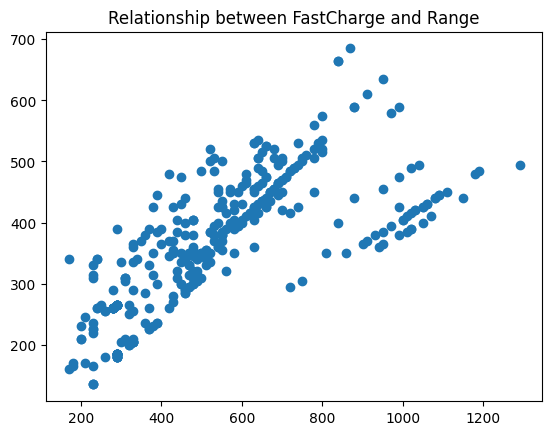

In [34]:
# Scatter plot between FastCharge and range
plt.scatter(x=data['FastCharge'], y=data['Range'])
#plt.xlabel=('FastCharge')
#plt.ylabel=('Range')
plt.title('Relationship between FastCharge and Range')
plt.show()

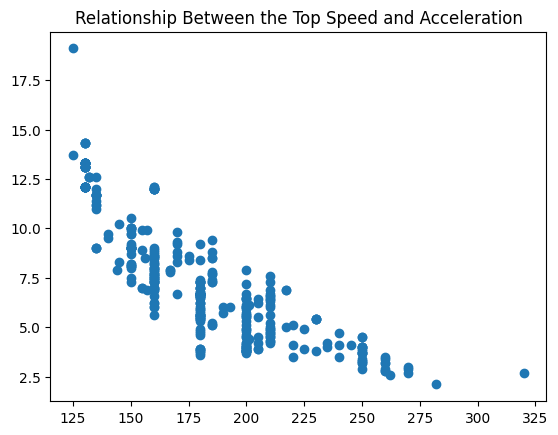

In [20]:
# Scatter plot between Top speed and Acceleration 
plt.scatter(x=data['TopSpeed'], y=data['AccelerationTime'])
#plt.xlabel('TopSpeed')
#plt.ylabel('AccelerationTime')
plt.title('Relationship Between the Top Speed and Acceleration')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

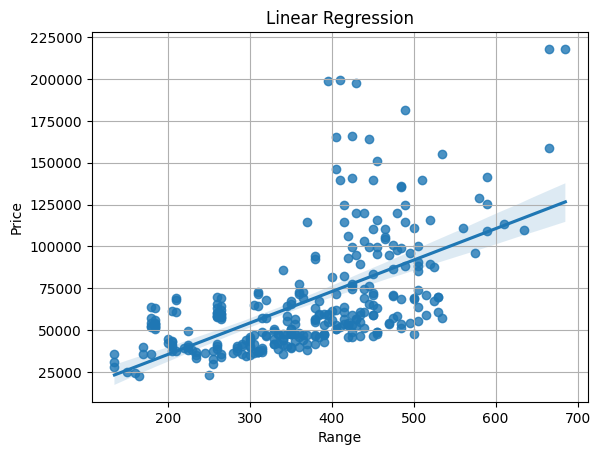

In [21]:
sns.regplot(x=data['Range'], y=data['Price'])
plt.grid(True)
plt.title('Linear Regression')
plt.show

Efficiency
257    15
190    12
171    11
169    11
168    11
       ..
161     1
189     1
152     1
243     1
293     1
Name: count, Length: 92, dtype: int64


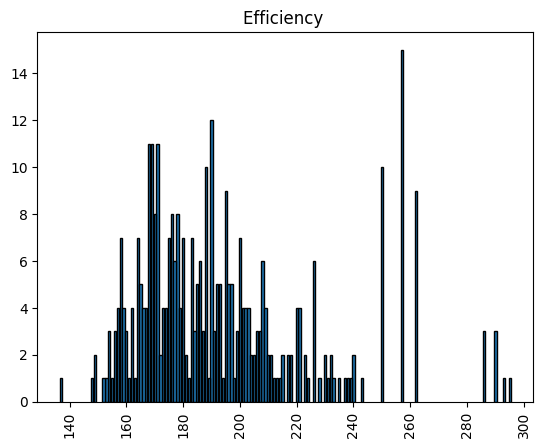

In [22]:
frequency_table=data['Efficiency'].value_counts()
print(frequency_table)

#Create a bar plot
plt.bar(frequency_table.index, frequency_table.values, edgecolor='black')

#Set chat title and axis labels
#plt.xlabel('Efficiency')
#plt.ylabel('Frequency')
plt.title('Efficiency ')

#Rotate x axis at 90 degree
plt.xticks(rotation=90)
plt.show()

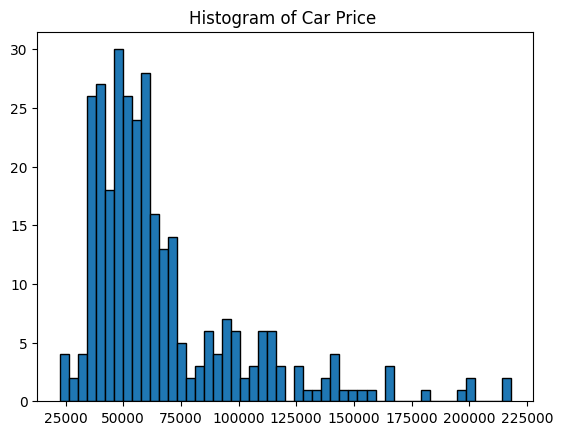

In [23]:
# Create a Histogram based on the Price
plt.hist(data['Price'], bins=50, edgecolor='black')

# Set the plot label and title
#plt.xlabel('Price')
#plt.ylabel('Frequency')
plt.title('Histogram of Car Price ')
plt.show()

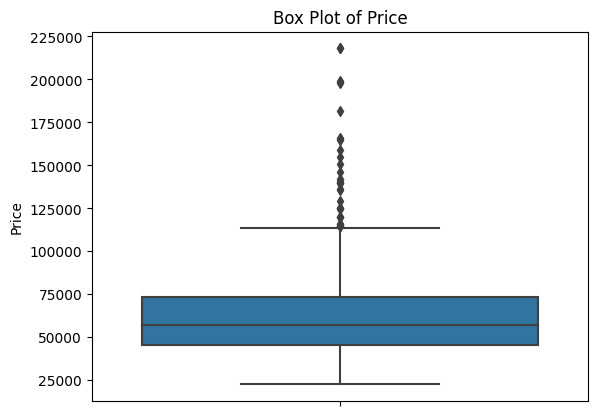

In [24]:
#Display Boxplot
sns.boxplot(y=data['Price'])
plt.title('Box Plot of Price')
plt.show()


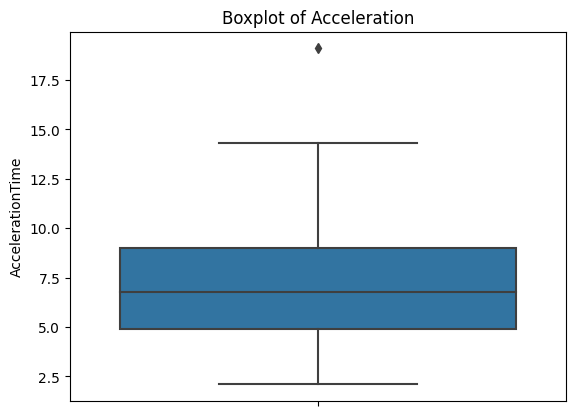

In [25]:
sns.boxplot(data=data, y='AccelerationTime')
plt.xticks(rotation=90)
plt.title('Boxplot of Acceleration')
plt.show()

In [26]:
data.corr(numeric_only=True)

,Battery,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
Battery,1.000000,0.177427,0.597290,0.704391,0.881937,0.698193,-0.610164
Efficiency,0.177427,1.000000,-0.280822,0.179422,-0.282097,-0.176437,0.389531
FastCharge,0.597290,-0.280822,1.000000,0.618951,0.720674,0.775925,-0.671587
Price,0.704391,0.179422,0.618951,1.000000,0.594143,0.762891,-0.537712
Range,0.881937,-0.282097,0.720674,0.594143,1.000000,0.744192,-0.744583
TopSpeed,0.698193,-0.176437,0.775925,0.762891,0.744192,1.000000,-0.839394
AccelerationTime,-0.610164,0.389531,-0.671587,-0.537712,-0.744583,-0.839394,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

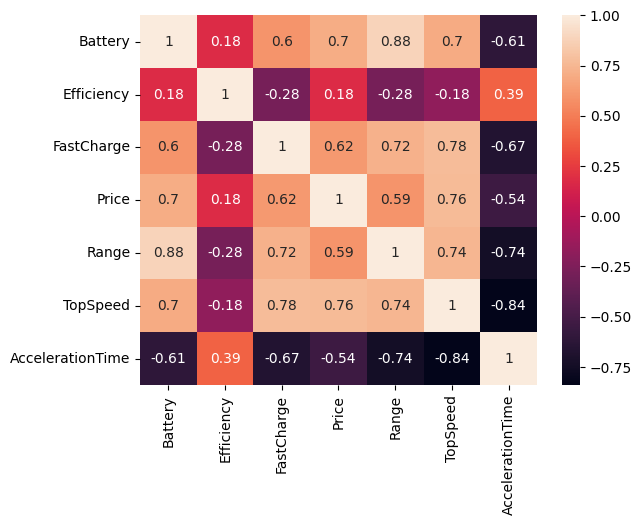

In [27]:
# plot Heatmap
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.show

In [28]:
# Measure Strenth of depedence between two variable
data.corr(method='kendall',numeric_only=True)

,Battery,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
Battery,1.000000,0.222183,0.488655,0.653436,0.724466,0.575775,-0.478964
Efficiency,0.222183,1.000000,-0.120782,0.318228,-0.069771,0.021350,0.002011
FastCharge,0.488655,-0.120782,1.000000,0.422015,0.622775,0.632250,-0.525374
Price,0.653436,0.318228,0.422015,1.000000,0.469803,0.533362,-0.438738
Range,0.724466,-0.069771,0.622775,0.469803,1.000000,0.619990,-0.531290
TopSpeed,0.575775,0.021350,0.632250,0.533362,0.619990,1.000000,-0.730297
AccelerationTime,-0.478964,0.002011,-0.525374,-0.438738,-0.531290,-0.730297,1.000000


In [29]:
# Measure the Strength of the linear relationship between two variables
data.corr(method='pearson',numeric_only=True)

,Battery,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
Battery,1.000000,0.177427,0.597290,0.704391,0.881937,0.698193,-0.610164
Efficiency,0.177427,1.000000,-0.280822,0.179422,-0.282097,-0.176437,0.389531
FastCharge,0.597290,-0.280822,1.000000,0.618951,0.720674,0.775925,-0.671587
Price,0.704391,0.179422,0.618951,1.000000,0.594143,0.762891,-0.537712
Range,0.881937,-0.282097,0.720674,0.594143,1.000000,0.744192,-0.744583
TopSpeed,0.698193,-0.176437,0.775925,0.762891,0.744192,1.000000,-0.839394
AccelerationTime,-0.610164,0.389531,-0.671587,-0.537712,-0.744583,-0.839394,1.000000
